<a href="https://colab.research.google.com/github/SumathiJayakumar04/Duplicate-identifier/blob/main/Final_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas==2.2.2 wfdb neurokit2 scikit-learn matplotlib numpy --no-cache-dir



INFO: pip is looking at multiple versions of wfdb to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 194.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 55.4 MB/s eta 0:00:00


In [3]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load one ECG record (MIT-BIH)
ecg_record = wfdb.rdrecord('100', pn_dir='mitdb')

ecg_signal = ecg_record.p_signal[:, 0]   # Lead II
fs_ecg = ecg_record.fs

print("ECG sampling rate:", fs_ecg)
print("ECG signal length:", len(ecg_signal))


ECG sampling rate: 360
ECG signal length: 650000


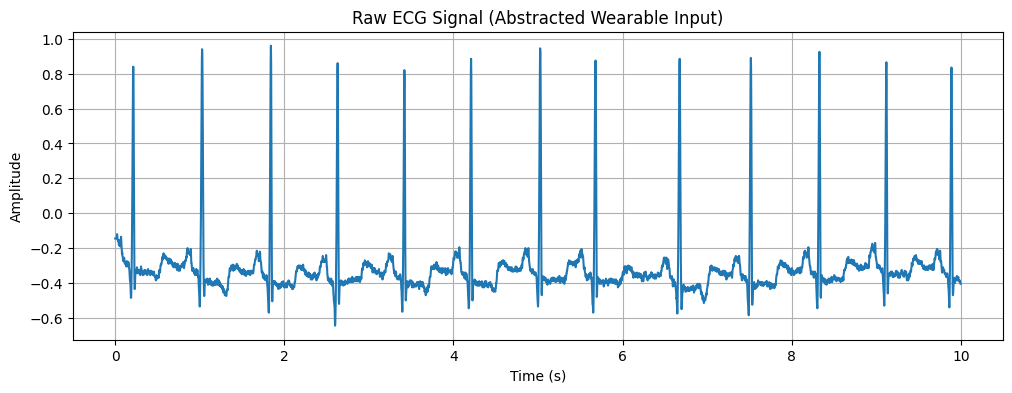

In [5]:
time = np.arange(0, 10 * fs_ecg) / fs_ecg

plt.figure(figsize=(12,4))
plt.plot(time, ecg_signal[:10*fs_ecg])
plt.title("Raw ECG Signal (Abstracted Wearable Input)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


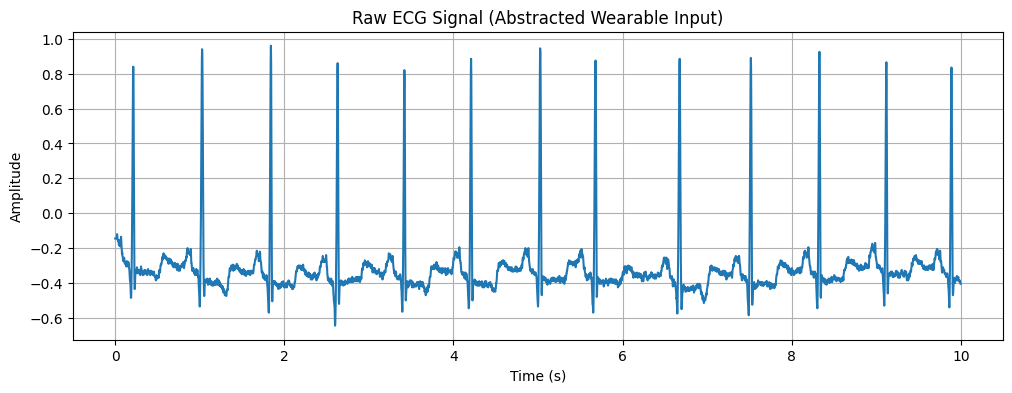

In [6]:
time = np.arange(0, 10 * fs_ecg) / fs_ecg

plt.figure(figsize=(12,4))
plt.plot(time, ecg_signal[:10*fs_ecg])
plt.title("Raw ECG Signal (Abstracted Wearable Input)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [7]:
import os

os.listdir()



['.config', 'sample_data']

In [8]:
for item in os.listdir():
    print(item)



.config
sample_data


In [9]:
import wfdb

wfdb.dl_database('bidmc', '.')



Generating record list for: bidmc01
Generating record list for: bidmc02
Generating record list for: bidmc03
Generating record list for: bidmc04
Generating record list for: bidmc05
Generating record list for: bidmc06
Generating record list for: bidmc07
Generating record list for: bidmc08
Generating record list for: bidmc09
Generating record list for: bidmc10
Generating record list for: bidmc11
Generating record list for: bidmc12
Generating record list for: bidmc13
Generating record list for: bidmc14
Generating record list for: bidmc15
Generating record list for: bidmc16
Generating record list for: bidmc17
Generating record list for: bidmc18
Generating record list for: bidmc19
Generating record list for: bidmc20
Generating record list for: bidmc21
Generating record list for: bidmc22
Generating record list for: bidmc23
Generating record list for: bidmc24
Generating record list for: bidmc25
Generating record list for: bidmc26
Generating record list for: bidmc27
Generating record list for: 

In [10]:
import os

os.listdir()


['.config',
 'bidmc18.dat',
 'bidmc20.dat',
 'bidmc39.hea',
 'bidmc41.dat',
 'bidmc17.hea',
 'bidmc31.hea',
 'bidmc53.dat',
 'bidmc09.hea',
 'bidmc27.hea',
 'bidmc22.dat',
 'bidmc53.hea',
 'bidmc52.dat',
 'bidmc51.hea',
 'bidmc42.dat',
 'bidmc16.hea',
 'bidmc44.hea',
 'bidmc03.dat',
 'bidmc38.hea',
 'bidmc38.dat',
 'bidmc11.hea',
 'bidmc02.dat',
 'bidmc34.dat',
 'bidmc08.dat',
 'bidmc51.dat',
 'bidmc29.dat',
 'bidmc41.hea',
 'bidmc17.dat',
 'bidmc18.hea',
 'bidmc04.hea',
 'bidmc36.dat',
 'bidmc06.dat',
 'bidmc15.hea',
 'bidmc03.hea',
 'bidmc01.hea',
 'bidmc35.hea',
 'bidmc29.hea',
 'bidmc35.dat',
 'bidmc14.hea',
 'bidmc23.hea',
 'bidmc49.dat',
 'bidmc46.hea',
 'bidmc21.hea',
 'bidmc20.hea',
 'bidmc31.dat',
 'bidmc45.hea',
 'bidmc12.hea',
 'bidmc25.dat',
 'bidmc46.dat',
 'bidmc48.hea',
 'bidmc34.hea',
 'bidmc11.dat',
 'bidmc10.hea',
 'bidmc13.hea',
 'bidmc01.dat',
 'bidmc09.dat',
 'bidmc42.hea',
 'bidmc07.dat',
 'bidmc37.dat',
 'bidmc48.dat',
 'bidmc02.hea',
 'bidmc12.dat',
 'bidmc30.he

In [11]:
import os

[f for f in os.listdir() if f.startswith('bidmc01')]


['bidmc01.hea', 'bidmc01.dat']

In [12]:
import wfdb

ppg_record = wfdb.rdrecord('bidmc01')

print(ppg_record.sig_name)
print("Sampling rate:", ppg_record.fs)


['RESP,', 'PLETH,', 'V,', 'AVR,', 'II,']
Sampling rate: 125


In [13]:
ppg_record.sig_name



['RESP,', 'PLETH,', 'V,', 'AVR,', 'II,']

In [14]:
# Remove commas and extra spaces from channel names
clean_sig_names = [ch.strip().replace(',', '') for ch in ppg_record.sig_name]

print(clean_sig_names)


['RESP', 'PLETH', 'V', 'AVR', 'II']


In [15]:
ppg_index = clean_sig_names.index('PLETH')

ppg_signal = ppg_record.p_signal[:, ppg_index]
fs_ppg = ppg_record.fs

print("PPG signal extracted successfully")
print("Sampling rate:", fs_ppg)


PPG signal extracted successfully
Sampling rate: 125


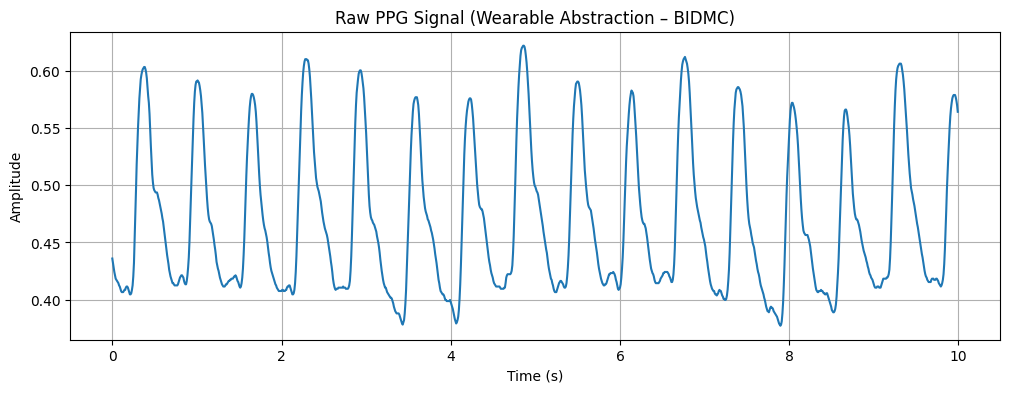

In [16]:
import numpy as np
import matplotlib.pyplot as plt

time_ppg = np.arange(0, 10 * fs_ppg) / fs_ppg

plt.figure(figsize=(12,4))
plt.plot(time_ppg, ppg_signal[:10*fs_ppg])
plt.title("Raw PPG Signal (Wearable Abstraction – BIDMC)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [17]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Clean ECG signal
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=fs_ecg)

print("ECG cleaned successfully")


ECG cleaned successfully


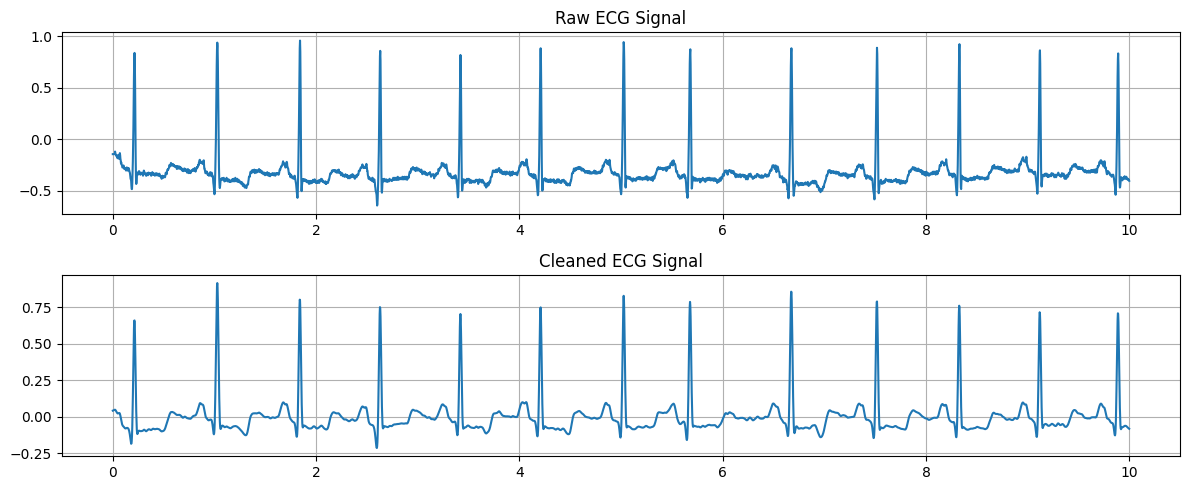

In [19]:
time_ecg = np.arange(0, 10 * fs_ecg) / fs_ecg

plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.plot(time_ecg, ecg_signal[:10*fs_ecg])
plt.title("Raw ECG Signal")
plt.grid()

plt.subplot(2,1,2)
plt.plot(time_ecg, ecg_cleaned[:10*fs_ecg])
plt.title("Cleaned ECG Signal")
plt.grid()

plt.tight_layout()
plt.show()


In [20]:
# Clean PPG signal
ppg_cleaned = nk.ppg_clean(ppg_signal, sampling_rate=fs_ppg)

print("PPG cleaned successfully")


PPG cleaned successfully


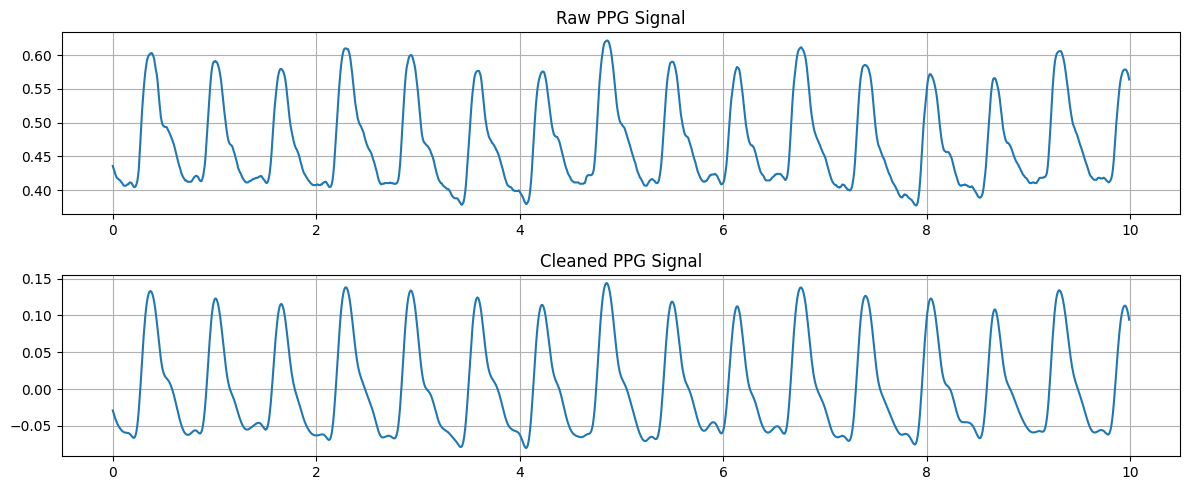

In [21]:
time_ppg = np.arange(0, 10 * fs_ppg) / fs_ppg

plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.plot(time_ppg, ppg_signal[:10*fs_ppg])
plt.title("Raw PPG Signal")
plt.grid()

plt.subplot(2,1,2)
plt.plot(time_ppg, ppg_cleaned[:10*fs_ppg])
plt.title("Cleaned PPG Signal")
plt.grid()

plt.tight_layout()
plt.show()


In [22]:
# Normalize ECG
ecg_norm = (ecg_cleaned - np.mean(ecg_cleaned)) / np.std(ecg_cleaned)

# Normalize PPG
ppg_norm = (ppg_cleaned - np.mean(ppg_cleaned)) / np.std(ppg_cleaned)

print("Normalization completed")


Normalization completed


In [23]:
window_sec = 5

ecg_window = window_sec * fs_ecg
ppg_window = window_sec * fs_ppg

ecg_segments = []
ppg_segments = []

min_len = min(len(ecg_norm) // ecg_window,
              len(ppg_norm) // ppg_window)

for i in range(min_len):
    ecg_segments.append(
        ecg_norm[i*ecg_window : (i+1)*ecg_window]
    )
    ppg_segments.append(
        ppg_norm[i*ppg_window : (i+1)*ppg_window]
    )

ecg_segments = np.array(ecg_segments)
ppg_segments = np.array(ppg_segments)

print("ECG segments shape:", ecg_segments.shape)
print("PPG segments shape:", ppg_segments.shape)


ECG segments shape: (96, 1800)
PPG segments shape: (96, 625)


In [24]:
import neurokit2 as nk
import pandas as pd
import numpy as np


In [25]:
features = []

for seg in ecg_segments:
    try:
        # ECG processing
        signals, info = nk.ecg_process(seg, sampling_rate=fs_ecg)
        rpeaks = info["ECG_R_Peaks"]

        # HRV features
        hrv = nk.hrv_time(rpeaks, sampling_rate=fs_ecg)

        features.append({
            "HR_mean": hrv["HRV_MeanNN"].values[0],
            "HRV_SDNN": hrv["HRV_SDNN"].values[0],
            "HRV_RMSSD": hrv["HRV_RMSSD"].values[0]
        })

    except:
        # Skip noisy or invalid segments
        continue

features_df = pd.DataFrame(features)
print("Feature table shape:", features_df.shape)


Feature table shape: (96, 3)


In [26]:
def assign_risk(sdnn):
    if sdnn > 100:
        return "Normal"
    elif sdnn > 50:
        return "Moderate"
    else:
        return "High"


In [27]:
features_df["Risk_Label"] = features_df["HRV_SDNN"].apply(assign_risk)

print(features_df["Risk_Label"].value_counts())


Risk_Label
High        87
Moderate     7
Normal       2
Name: count, dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features_df["Risk_Encoded"] = le.fit_transform(features_df["Risk_Label"])

features_df.head()


,HR_mean,HRV_SDNN,HRV_RMSSD,Risk_Label,Risk_Encoded
0,795.138889,10.728361,13.028933,High,0
1,841.666667,89.688246,78.383061,Moderate,1
2,824.444444,21.995370,23.814484,High,0
3,818.333333,28.639414,35.950498,High,0
4,803.333333,22.429588,15.214515,High,0


In [29]:
num_samples = len(features_df)

ecg_segments = ecg_segments[:num_samples]
ppg_segments = ppg_segments[:num_samples]

labels = features_df["Risk_Encoded"].values

print("Final ECG shape:", ecg_segments.shape)
print("Final PPG shape:", ppg_segments.shape)
print("Labels shape:", labels.shape)


Final ECG shape: (96, 1800)
Final PPG shape: (96, 625)
Labels shape: (96,)


In [30]:
# Add channel dimension
X_ecg = ecg_segments[..., np.newaxis]
X_ppg = ppg_segments[..., np.newaxis]
y = labels

print("ECG input shape:", X_ecg.shape)
print("PPG input shape:", X_ppg.shape)
print("Labels shape:", y.shape)


ECG input shape: (96, 1800, 1)
PPG input shape: (96, 625, 1)
Labels shape: (96,)


In [31]:
from sklearn.model_selection import train_test_split

X_ecg_train, X_ecg_test, \
X_ppg_train, X_ppg_test, \
y_train, y_test = train_test_split(
    X_ecg, X_ppg, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D,
    LSTM, Dense, Dropout, BatchNormalization,
    concatenate
)
from tensorflow.keras.models import Model


In [33]:
ecg_input = Input(
    shape=(X_ecg_train.shape[1], 1),
    name="ECG_Input"
)

x1 = Conv1D(32, kernel_size=5, activation="relu")(ecg_input)
x1 = BatchNormalization()(x1)
x1 = MaxPooling1D(pool_size=2)(x1)

x1 = Conv1D(64, kernel_size=5, activation="relu")(x1)
x1 = MaxPooling1D(pool_size=2)(x1)

x1 = LSTM(64)(x1)


In [34]:
ppg_input = Input(
    shape=(X_ppg_train.shape[1], 1),
    name="PPG_Input"
)

x2 = Conv1D(32, kernel_size=5, activation="relu")(ppg_input)
x2 = BatchNormalization()(x2)
x2 = MaxPooling1D(pool_size=2)(x2)

x2 = Conv1D(64, kernel_size=5, activation="relu")(x2)
x2 = MaxPooling1D(pool_size=2)(x2)

x2 = LSTM(64)(x2)


In [35]:
combined = concatenate([x1, x2], name="Fusion_Layer")

combined = Dense(64, activation="relu")(combined)
combined = Dropout(0.3)(combined)


In [36]:
output = Dense(3, activation="softmax", name="Risk_Output")(combined)

model = Model(
    inputs=[ecg_input, ppg_input],
    outputs=output
)


In [37]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ECG_Input           │ (None, 1800, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PPG_Input           │ (None, 625, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1796, 32)  │        192 │ ECG_Input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 621, 32)   │        192 │ PPG_Input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1796, 32)  │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 621, 32)   │        128 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 898, 32)   │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 310, 32)   │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 894, 64)   │     10,304 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 306, 64)   │     10,304 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 447, 64)   │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 153, 64)   │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     33,024 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     33,024 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Fusion_Layer        │ (None, 128)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ Fusion_Layer[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Risk_Output (Dense) │ (None, 3)         │        195 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,747 (374.01 KB)

 Trainable params: 95,619 (373.51 KB)

 Non-trainable params: 128 (512.00 B)

In [38]:
history = model.fit(
    [X_ecg_train, X_ppg_train],
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1993 - loss: 1.2060 - val_accuracy: 0.8750 - val_loss: 1.0405
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - accuracy: 0.8917 - loss: 0.7287 - val_accuracy: 0.8750 - val_loss: 0.9410
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - accuracy: 0.9236 - loss: 0.4971 - val_accuracy: 0.8750 - val_loss: 0.8355
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step - accuracy: 0.9028 - loss: 0.4270 - val_accuracy: 0.8750 - val_loss: 0.7354
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 491ms/step - accuracy: 0.9028 - loss: 0.3403 - val_accuracy: 0.8750 - val_loss: 0.6509
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 494ms/step - accuracy: 0.9236 - loss: 0.3902 - val_accuracy: 0.8750 - val_loss: 0.5966
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - accuracy: 0.9132 - loss: 0.3532 - val_accuracy: 0.8750 - val_loss: 0.5693
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step - accuracy: 0.9132 - loss: 0.3287 - val_accuracy: 0.8750 - val_loss: 0

In [39]:
test_loss, test_acc = model.evaluate(
    [X_ecg_test, X_ppg_test],
    y_test,
    verbose=0
)

print("Test Accuracy:", round(test_acc, 4))


Test Accuracy: 0.9


In [40]:
# Predict class probabilities
y_pred_prob = model.predict([X_ecg_test, X_ppg_test])

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


In [41]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(acc, 4))


Test Accuracy: 0.9


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[18  0]
 [ 2  0]]


In [43]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        y_pred,
        labels=[0, 1, 2],            # all possible labels
        target_names=le.classes_,
        zero_division=0
    )
)


              precision    recall  f1-score   support

        High       0.90      1.00      0.95        18
    Moderate       0.00      0.00      0.00         2
      Normal       0.00      0.00      0.00         0

    accuracy                           0.90        20
   macro avg       0.30      0.33      0.32        20
weighted avg       0.81      0.90      0.85        20



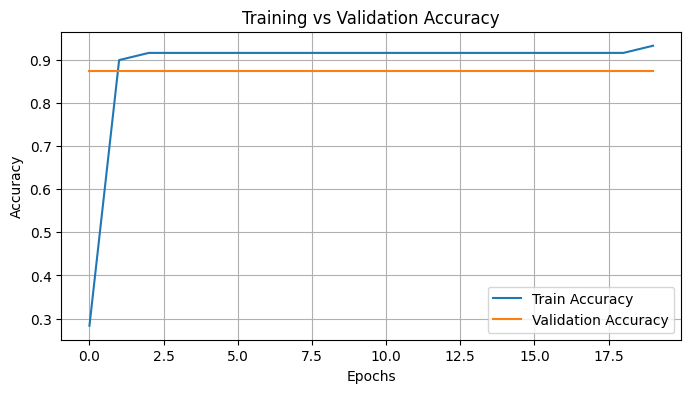

In [44]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Training vs Validation Accuracy')
plt.show()


In [45]:
!pip install shap


In [46]:
import shap
import numpy as np


In [47]:
# Select background samples
background_ecg = X_ecg_train[:50]
background_ppg = X_ppg_train[:50]


In [48]:
def model_predict(inputs):
    ecg, ppg = inputs
    return model.predict([ecg, ppg])


In [49]:
explainer = shap.GradientExplainer(
    model,
    [background_ecg, background_ppg]
)


In [50]:
sample_ecg = X_ecg_test[0:1]
sample_ppg = X_ppg_test[0:1]


In [51]:
shap_values = explainer.shap_values([sample_ecg, sample_ppg])



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


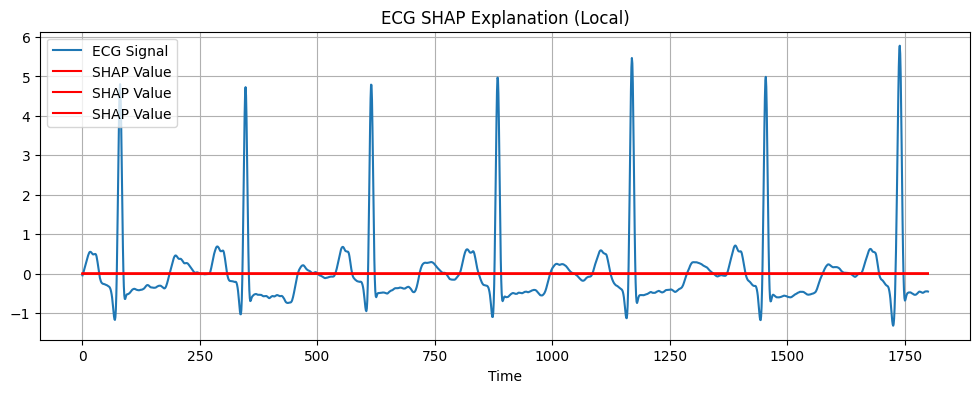

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Take SHAP values for predicted class
pred_class = np.argmax(model.predict([sample_ecg, sample_ppg]))

ecg_shap = shap_values[pred_class][0, :, 0]   # (timesteps,)
ecg_signal_plot = sample_ecg[0, :, 0]

plt.figure(figsize=(12,4))
plt.plot(ecg_signal_plot, label="ECG Signal")
plt.plot(ecg_shap, label="SHAP Value", color='red')
plt.legend()
plt.title("ECG SHAP Explanation (Local)")
plt.xlabel("Time")
plt.grid()
plt.show()


In [53]:
print(type(shap_values))
print(len(shap_values))

print("SHAP values shape for class", pred_class, ":")
print(shap_values[pred_class].shape)


<class 'list'>
2
SHAP values shape for class 0 :
(1, 1800, 1, 3)


In [54]:
pred_class = np.argmax(model.predict([sample_ecg, sample_ppg]))
print("Predicted class:", le.inverse_transform([pred_class])[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted class: High


In [55]:
# ECG SHAP values for predicted class
ecg_shap = shap_values[0][0, :, 0, pred_class]
ecg_signal_plot = sample_ecg[0, :, 0]


In [56]:
# PPG SHAP values for predicted class
ppg_shap = shap_values[1][0, :, 0, pred_class]
ppg_signal_plot = sample_ppg[0, :, 0]


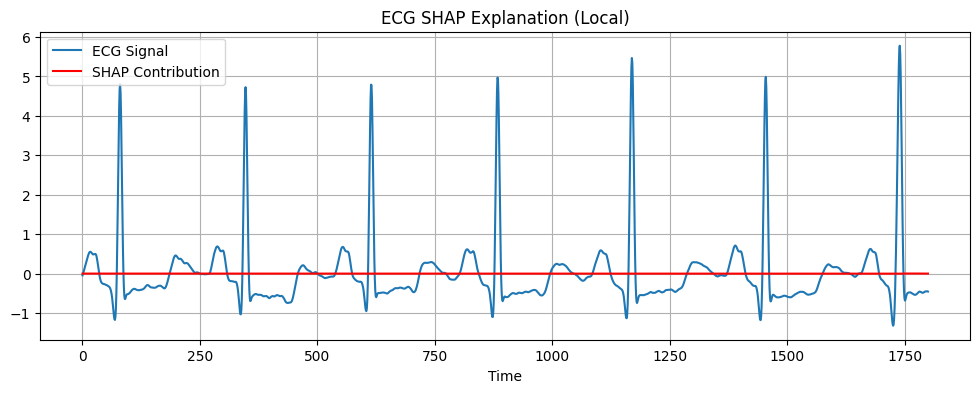

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(ecg_signal_plot, label="ECG Signal")
plt.plot(ecg_shap, label="SHAP Contribution", color="red")
plt.legend()
plt.title("ECG SHAP Explanation (Local)")
plt.xlabel("Time")
plt.grid()
plt.show()


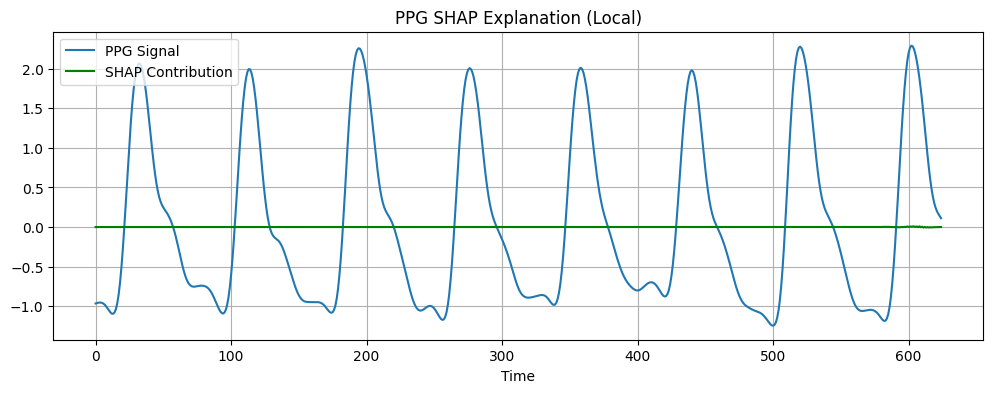

In [58]:
plt.figure(figsize=(12,4))
plt.plot(ppg_signal_plot, label="PPG Signal")
plt.plot(ppg_shap, label="SHAP Contribution", color="green")
plt.legend()
plt.title("PPG SHAP Explanation (Local)")
plt.xlabel("Time")
plt.grid()
plt.show()


In [59]:
features_df



,HR_mean,HRV_SDNN,HRV_RMSSD,Risk_Label,Risk_Encoded
0,795.138889,10.728361,13.028933,High,0
1,841.666667,89.688246,78.383061,Moderate,1
2,824.444444,21.995370,23.814484,High,0
3,818.333333,28.639414,35.950498,High,0
4,803.333333,22.429588,15.214515,High,0
...,...,...,...,...,...
91,732.222222,31.340917,21.017703,High,0
92,747.222222,15.416041,16.433555,High,0
93,795.555556,32.784839,29.853035,High,0
94,761.111111,80.411749,99.768250,Moderate,1


In [60]:
X_baseline = features_df[['HR_mean', 'HRV_SDNN', 'HRV_RMSSD']]
y_baseline = features_df['Risk_Encoded']


In [61]:
from sklearn.model_selection import train_test_split

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_baseline,
    y_baseline,
    test_size=0.2,
    random_state=42,
    stratify=y_baseline
)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(Xb_train, yb_train)

y_pred_baseline = baseline_model.predict(Xb_test)

baseline_accuracy = accuracy_score(yb_test, y_pred_baseline)

print("Baseline Accuracy:", round(baseline_accuracy, 4))


Baseline Accuracy: 1.0


In [63]:
test_loss, test_accuracy = model.evaluate(
    [X_ecg_test, X_ppg_test],
    y_test,
    verbose=0
)

print("CNN–LSTM (ECG + PPG) Test Accuracy:", round(test_accuracy, 4))



CNN–LSTM (ECG + PPG) Test Accuracy: 0.9


In [64]:
ecg_ppg_cnn_lstm_accuracy = test_accuracy


In [65]:
print("Baseline Accuracy:", baseline_accuracy)
print("ECG + PPG CNN–LSTM Accuracy:", ecg_ppg_cnn_lstm_accuracy)


Baseline Accuracy: 1.0
ECG + PPG CNN–LSTM Accuracy: 0.8999999761581421


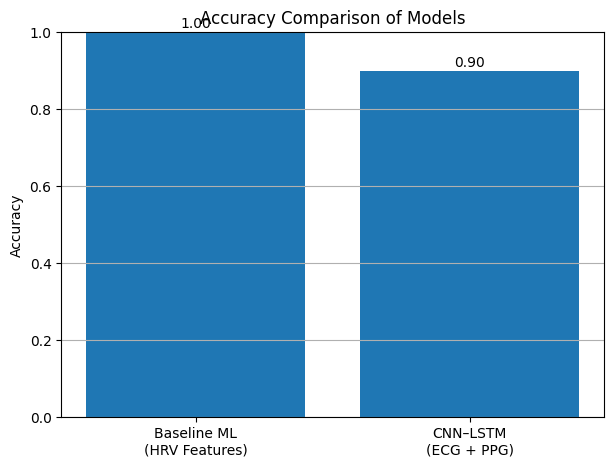

In [66]:
import matplotlib.pyplot as plt

models = [
    'Baseline ML\n(HRV Features)',
    'CNN–LSTM\n(ECG + PPG)'
]

accuracies = [
    baseline_accuracy,
    ecg_ppg_cnn_lstm_accuracy
]

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracies)

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.01,
        f"{yval:.2f}",
        ha='center'
    )

plt.show()


In [67]:
import numpy as np

# Get prediction probabilities
y_pred_prob = model.predict([X_ecg_test, X_ppg_test])

# Convert probabilities to predicted class
y_pred = np.argmax(y_pred_prob, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(cm)


Confusion Matrix:

[[18  0]
 [ 2  0]]


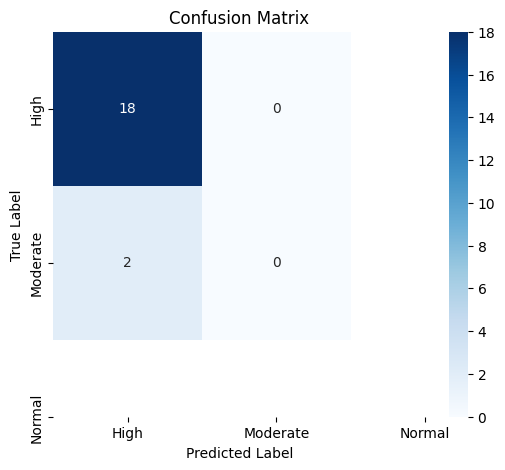

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [72]:
import numpy as np

print("Classes present in y_test:", np.unique(y_test))


Classes present in y_test: [0 1]


In [73]:
from sklearn.metrics import classification_report

present_labels = np.unique(y_test)

print(classification_report(
    y_test,
    y_pred,
    labels=present_labels,
    target_names=le.inverse_transform(present_labels),
    zero_division=0
))


              precision    recall  f1-score   support

        High       0.90      1.00      0.95        18
    Moderate       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

